In [1]:
natural_sciences = [
    "Physics",
    "Chemistry",
    "Biology",
    "Earth Sciences",  # (Geology, Oceanography, Meteorology)
    "Astronomy",
    "Environmental Science",
    "Materials Science",]


life_sciences = ["Medicine",
    "Neuroscience",
    "Genetics",
    "Ecology",
    "Molecular Biology",
    "Biochemistry",
    "Pharmacology",
    "Public Health",
    "Nursing",
    "Biomedical Engineering",] # Straddles Engineering/Medicine

formal_sciences = ["Mathematics",
    "Statistics",
    "Computer Science",
    "Logic", # Often within Philosophy or Math
    "Data Science",] # Interdisciplinary but distinct focus

    # --- Social Sciences ---
social_sciences = ["Psychology",
    "Sociology",
    "Anthropology",
    "Economics",
    "Political Science",
    "Geography", # (Human Geography focus)
    "Communication Studies",
    "Education",
    "Archaeology",] # Straddles Humanities/Social Sciences

humanities = ["History",
    "Philosophy",
    "Literature", # (English, Comparative, etc.)
    "Linguistics",
    "Religious Studies",
    "Classics", # (Study of ancient Greece and Rome)
    "Art History",]

engineering = ["Mechanical Engineering",
    "Electrical Engineering",
    "Civil Engineering",
    "Chemical Engineering",
    "Aerospace Engineering",
    "Industrial Engineering",
    "Software Engineering", # Often within CS but distinct focus
    "Robotics",] # Interdisciplinary

arts = ["Visual Arts", # (Painting, Sculpture, Photography etc.)
    "Music", # (Musicology, Composition, Performance Studies)
    "Theatre Studies",
    "Film Studies",
    "Architecture",
    "Design",] # (Graphic Design, Industrial Design, Interaction Design)

professional = ["Law",
    "Business Administration", # (Management, Strategy)
    "Finance",
    "Marketing",
    "Accounting",
    "Urban Planning",
    "Library and Information Science",
    "Social Work",
    "Agricultural Science",]

disciplines = {"Natural Sciences": natural_sciences, "Life Sciences": life_sciences, "Formal Sciences": formal_sciences, "Social Sciences": social_sciences, "Humanities": humanities, "Engineering": engineering, "Arts": arts, "Professional": professional}

In [2]:
import pandas as pd

loaded_df = pd.read_csv('eval_data.csv')

loaded_df

,topic,prompt,completion,finetune_response,base_response
0,Physics,Exploring the behavior of dark matter interact...,**Research Approach: Exploring the Behavior of...,**Research Approach: Exploring the Behavior o...,**Introduction**\n\nDark matter is a hypothet...
1,Physics,Investigating the effects of quantum entanglem...,**Research Problem:** Investigating the effect...,Investigating the effects of quantum entangle...,Quantum entanglement is a phenomenon in which...
2,Chemistry,Investigation of the role of solvent effects o...,**Research Approach for Investigating the Role...,Investigation of the role of solvent effects ...,Investigation of the role of solvent effects ...
3,Chemistry,Development of sustainable catalytic processes...,**Research Approach for Developing Sustainable...,**Research Approach for Developing Sustainabl...,The development of sustainable catalytic proc...
4,Biology,Assessing the impact of microplastic ingestion...,**Research Approach: Assessing the Impact of M...,Assessing the Impact of Microplastic Ingestio...,Assessing the impact of microplastic ingestio...
...,...,...,...,...,...
117,Library and Information Science,How can machine learning algorithms improve pe...,**Research Problem:** \nHow can machine learn...,**Improving Personalized Book Recommendation ...,Machine learning algorithms can significantly...
118,Social Work,What are the effects of social media on the me...,**Research Problem:** \nWhat are the effects ...,The effects of social media on the mental hea...,The effects of social media on the mental hea...
119,Social Work,How does the integration of digital technology...,**Research Approach for Investigating the Impa...,The integration of digital technology has sig...,The integration of digital technology has tra...
120,Agricultural Science,What are the effects of biochar application on...,**Research Approach for Investigating the Effe...,The application of biochar has gained signifi...,"Biochar, a form of charcoal made from organic..."


In [33]:
from nltk.translate.meteor_score import meteor_score
from nltk import word_tokenize
import nltk
nltk.download('wordnet')
from rouge_score import rouge_scorer


finetuned_completion_meteor = []
finetuned_completion_rouge = []
base_completion_meteor = []
base_completion_rouge = []

for i in range(len(loaded_df)):
    reference = loaded_df.iloc[i]["completion"]
    finetune = loaded_df.iloc[i]["finetune_response"]
    base = loaded_df.iloc[i]["base_response"]

    reference_tokens = word_tokenize(reference)
    finetune_tokens = word_tokenize(finetune)
    base_tokens = word_tokenize(base)

    finetune_score = meteor_score([reference_tokens], finetune_tokens)
    finetuned_completion_meteor.append(finetune_score)
    base_score = meteor_score([reference_tokens], base_tokens)
    base_completion_meteor.append(base_score)

    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    finetune_rouge_score = scorer.score(reference, finetune)
    finetuned_completion_rouge.append(finetune_rouge_score['rougeL'].fmeasure)
    base_rouge_score = scorer.score(reference, base)
    base_completion_rouge.append(base_rouge_score['rougeL'].fmeasure)

print((sum(finetuned_completion_meteor) / len(finetuned_completion_meteor))/(sum(base_completion_meteor) / len(base_completion_meteor)))
print((sum(finetuned_completion_rouge) / len(finetuned_completion_rouge))/(sum(base_completion_rouge) / len(base_completion_rouge)))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ronaksingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


1.4036443499433313
1.6036860308702023


In [4]:
def get_field(topic):
    """Checks which field a topic belongs to."""
    for field_name, topics_list in disciplines.items():
        if topic in topics_list:
            return field_name
    # Decide how to handle topics not in any list
    return 'Other' # or return np.nan, or raise ValueError, etc.

# --- 3. Apply the function to create a new 'Field' column ---
topic_column_name = 'topic' # The name of the column containing the topics
loaded_df['category'] = loaded_df[topic_column_name].apply(get_field)

loaded_df['finetuned_completion_rouge'] = finetuned_completion_rouge
loaded_df['finetuned_completion_meteor'] = finetuned_completion_meteor
loaded_df['base_completion_rouge'] = base_completion_rouge
loaded_df['base_completion_meteor'] = base_completion_meteor

# loaded_df

average_all_numeric = loaded_df.groupby('category')[['finetuned_completion_rouge', 'finetuned_completion_meteor', 'base_completion_rouge', 'base_completion_meteor']].median()

average_all_numeric


,finetuned_completion_rouge,finetuned_completion_meteor,base_completion_rouge,base_completion_meteor
category,,,,
Arts,0.286370,0.403405,0.174938,0.297211
Engineering,0.308063,0.462971,0.185833,0.313727
Formal Sciences,0.192992,0.392765,0.166905,0.292473
Humanities,0.192229,0.334242,0.181107,0.292253
Life Sciences,0.366552,0.493233,0.169821,0.310446
Natural Sciences,0.362237,0.490815,0.188853,0.295921
Professional,0.207383,0.396623,0.176803,0.305735
Social Sciences,0.194768,0.386610,0.168208,0.314958


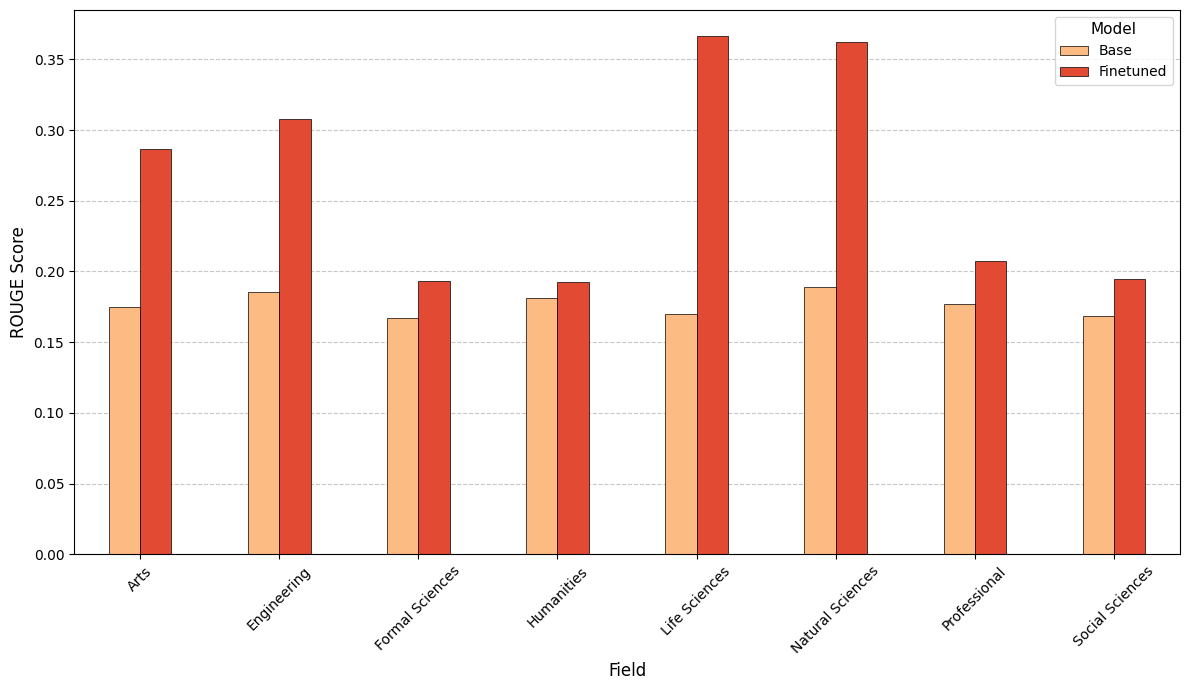

In [31]:
import matplotlib.pyplot as plt

# Select the columns for the grouped bar chart
plot_df = average_all_numeric[['base_completion_rouge', 'finetuned_completion_rouge']]

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Plot grouped bar chart with custom colors and bar width
plot_df.plot(kind='bar', ax=ax, color=['#fdbb84', '#e34a33'], width=0.45, edgecolor='black', linewidth=0.5)

# Customize title and labels
# ax.set_title('ROUGE Scores by Category', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Field', fontsize=12)
ax.set_ylabel('ROUGE Score', fontsize=12)

# Customize ticks
ax.tick_params(axis='x', rotation=45, labelsize=10, labelright=True)
ax.tick_params(axis='y', labelsize=10)

# Add grid lines for y-axis
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Customize legend
ax.legend(['Base', 'Finetuned'], title='Model', fontsize=10, title_fontsize=11, loc='upper right', frameon=True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot
plt.savefig('grouped_bar_chart_rouge.pdf')

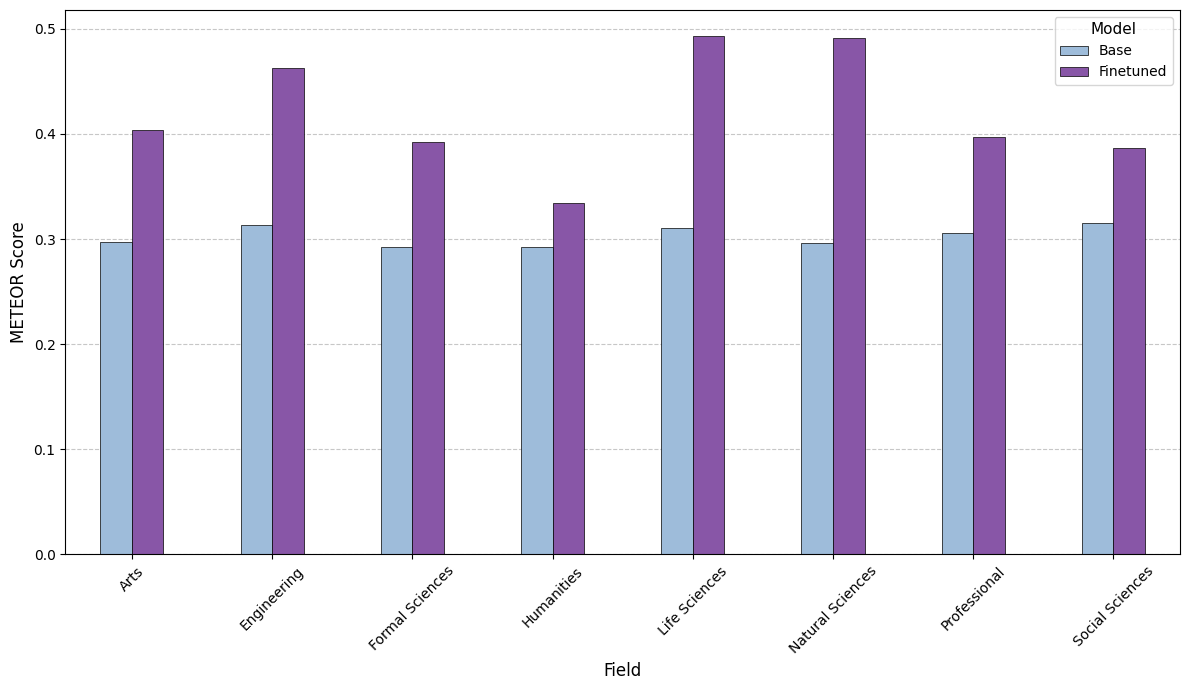

In [30]:
import matplotlib.pyplot as plt

# Select the columns for the grouped bar chart
plot_df = average_all_numeric[['base_completion_meteor', 'finetuned_completion_meteor']]

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Plot grouped bar chart with custom colors and bar width
plot_df.plot(kind='bar', ax=ax, color=['#9ebcda', '#8856a7'], width=0.45, edgecolor='black', linewidth=0.5)

# Customize title and labels
# ax.set_title('METEOR Scores by Category', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Field', fontsize=12)
ax.set_ylabel('METEOR Score', fontsize=12)

# Customize ticks
ax.tick_params(axis='x', rotation=45, labelsize=10, labelright=True)
ax.tick_params(axis='y', labelsize=10)

# Add grid lines for y-axis
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Customize legend
ax.legend(['Base', 'Finetuned'], title='Model', fontsize=10, title_fontsize=11, loc='upper right', frameon=True)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot
plt.savefig('grouped_bar_chart_meteor.pdf')